# Stroke Prediction Using Machine Learning

**Team Members:**
- 23201136 - Zawad Ahsan
- 23101228 - Abdullah Sajid Nafi

**Course:** CSE 422 FALL25 - Section 17

## Project Overview
This project implements and compares multiple machine learning models to predict stroke risk in patients based on various health and demographic features. The goal is to identify the most accurate model for early stroke prediction, which can assist healthcare professionals in preventive care.

## Dataset
The dataset contains patient information including demographic data, health indicators, and lifestyle factors. Key features include:
- Age, gender, BMI (Body Mass Index)
- Hypertension and heart disease status
- Average glucose level
- Smoking status
- Marital and residential information

## Methodology
1. **Exploratory Data Analysis (EDA)** - Understanding data distribution and relationships
2. **Data Preprocessing** - Handling missing values, encoding, and scaling
3. **Model Training** - Training multiple ML algorithms
4. **Model Evaluation** - Comparing performance using accuracy, ROC-AUC, and confusion matrices
5. **Model Selection** - Selecting the best performing model based on metrics

### **Importing Libraries and the Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, label_binarize, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.losses import SparseCategoricalCrossentropy

print("✓ All libraries successfully imported!")

✓ All libraries successfully imported!


Dataset = https://drive.google.com/file/d/18503AUrsLd25Vd-UgQK8IDy2ZlliKQ5g/view

In [55]:
stroke_data = pd.read_csv('Healthcare Dataset Stroke Data.csv')
print("✓ Dataset loaded successfully!")

✓ Dataset loaded successfully!


### **EDA**

In [56]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [57]:
dataset_shape = stroke_data.shape
print("Dataset Dimensions:")
print(f"  Samples  (Rows): {dataset_shape[0]} patients")
print(f"  Features (Cols): {dataset_shape[1]} attributes")

Dataset Dimensions:
  Samples  (Rows): 5110 patients
  Features (Cols): 12 attributes


In [58]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [59]:
numerical_data = stroke_data.select_dtypes(include='number')
numerical_features = numerical_data.columns.tolist()

print(f'✓ Identified {len(numerical_features)} numerical features:\n')
print(numerical_features)

✓ Identified 7 numerical features:

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [61]:
categorical_data = stroke_data.select_dtypes(include='object')
categorical_features = categorical_data.columns.tolist()

print(f'✓ Identified {len(categorical_features)} categorical features:\n')
print(categorical_features)

✓ Identified 5 categorical features:

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [62]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [63]:
categorical_data.describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [64]:
numerical_data.var()

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
stroke               4.636264e-02
dtype: float64

In [65]:
numerical_data.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

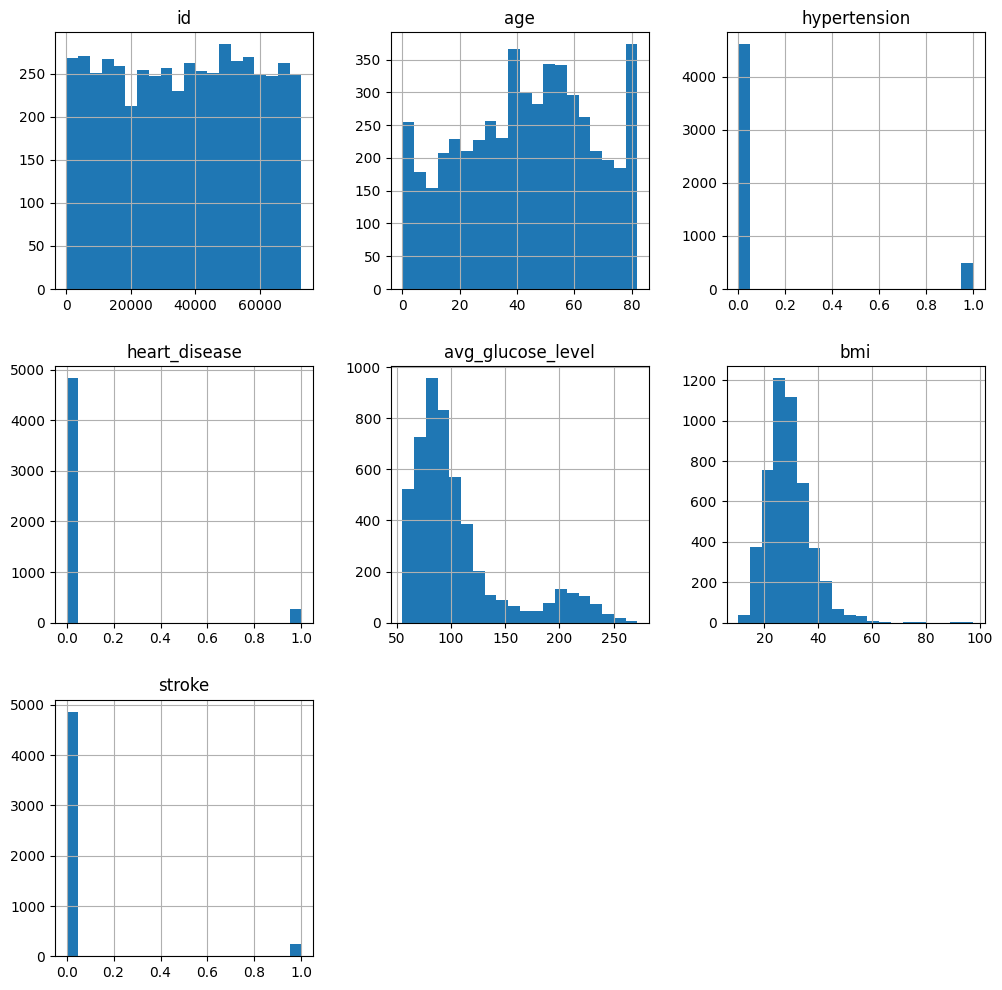

In [66]:
numerical_data.hist(figsize=(12,12), bins=20)
plt.show()

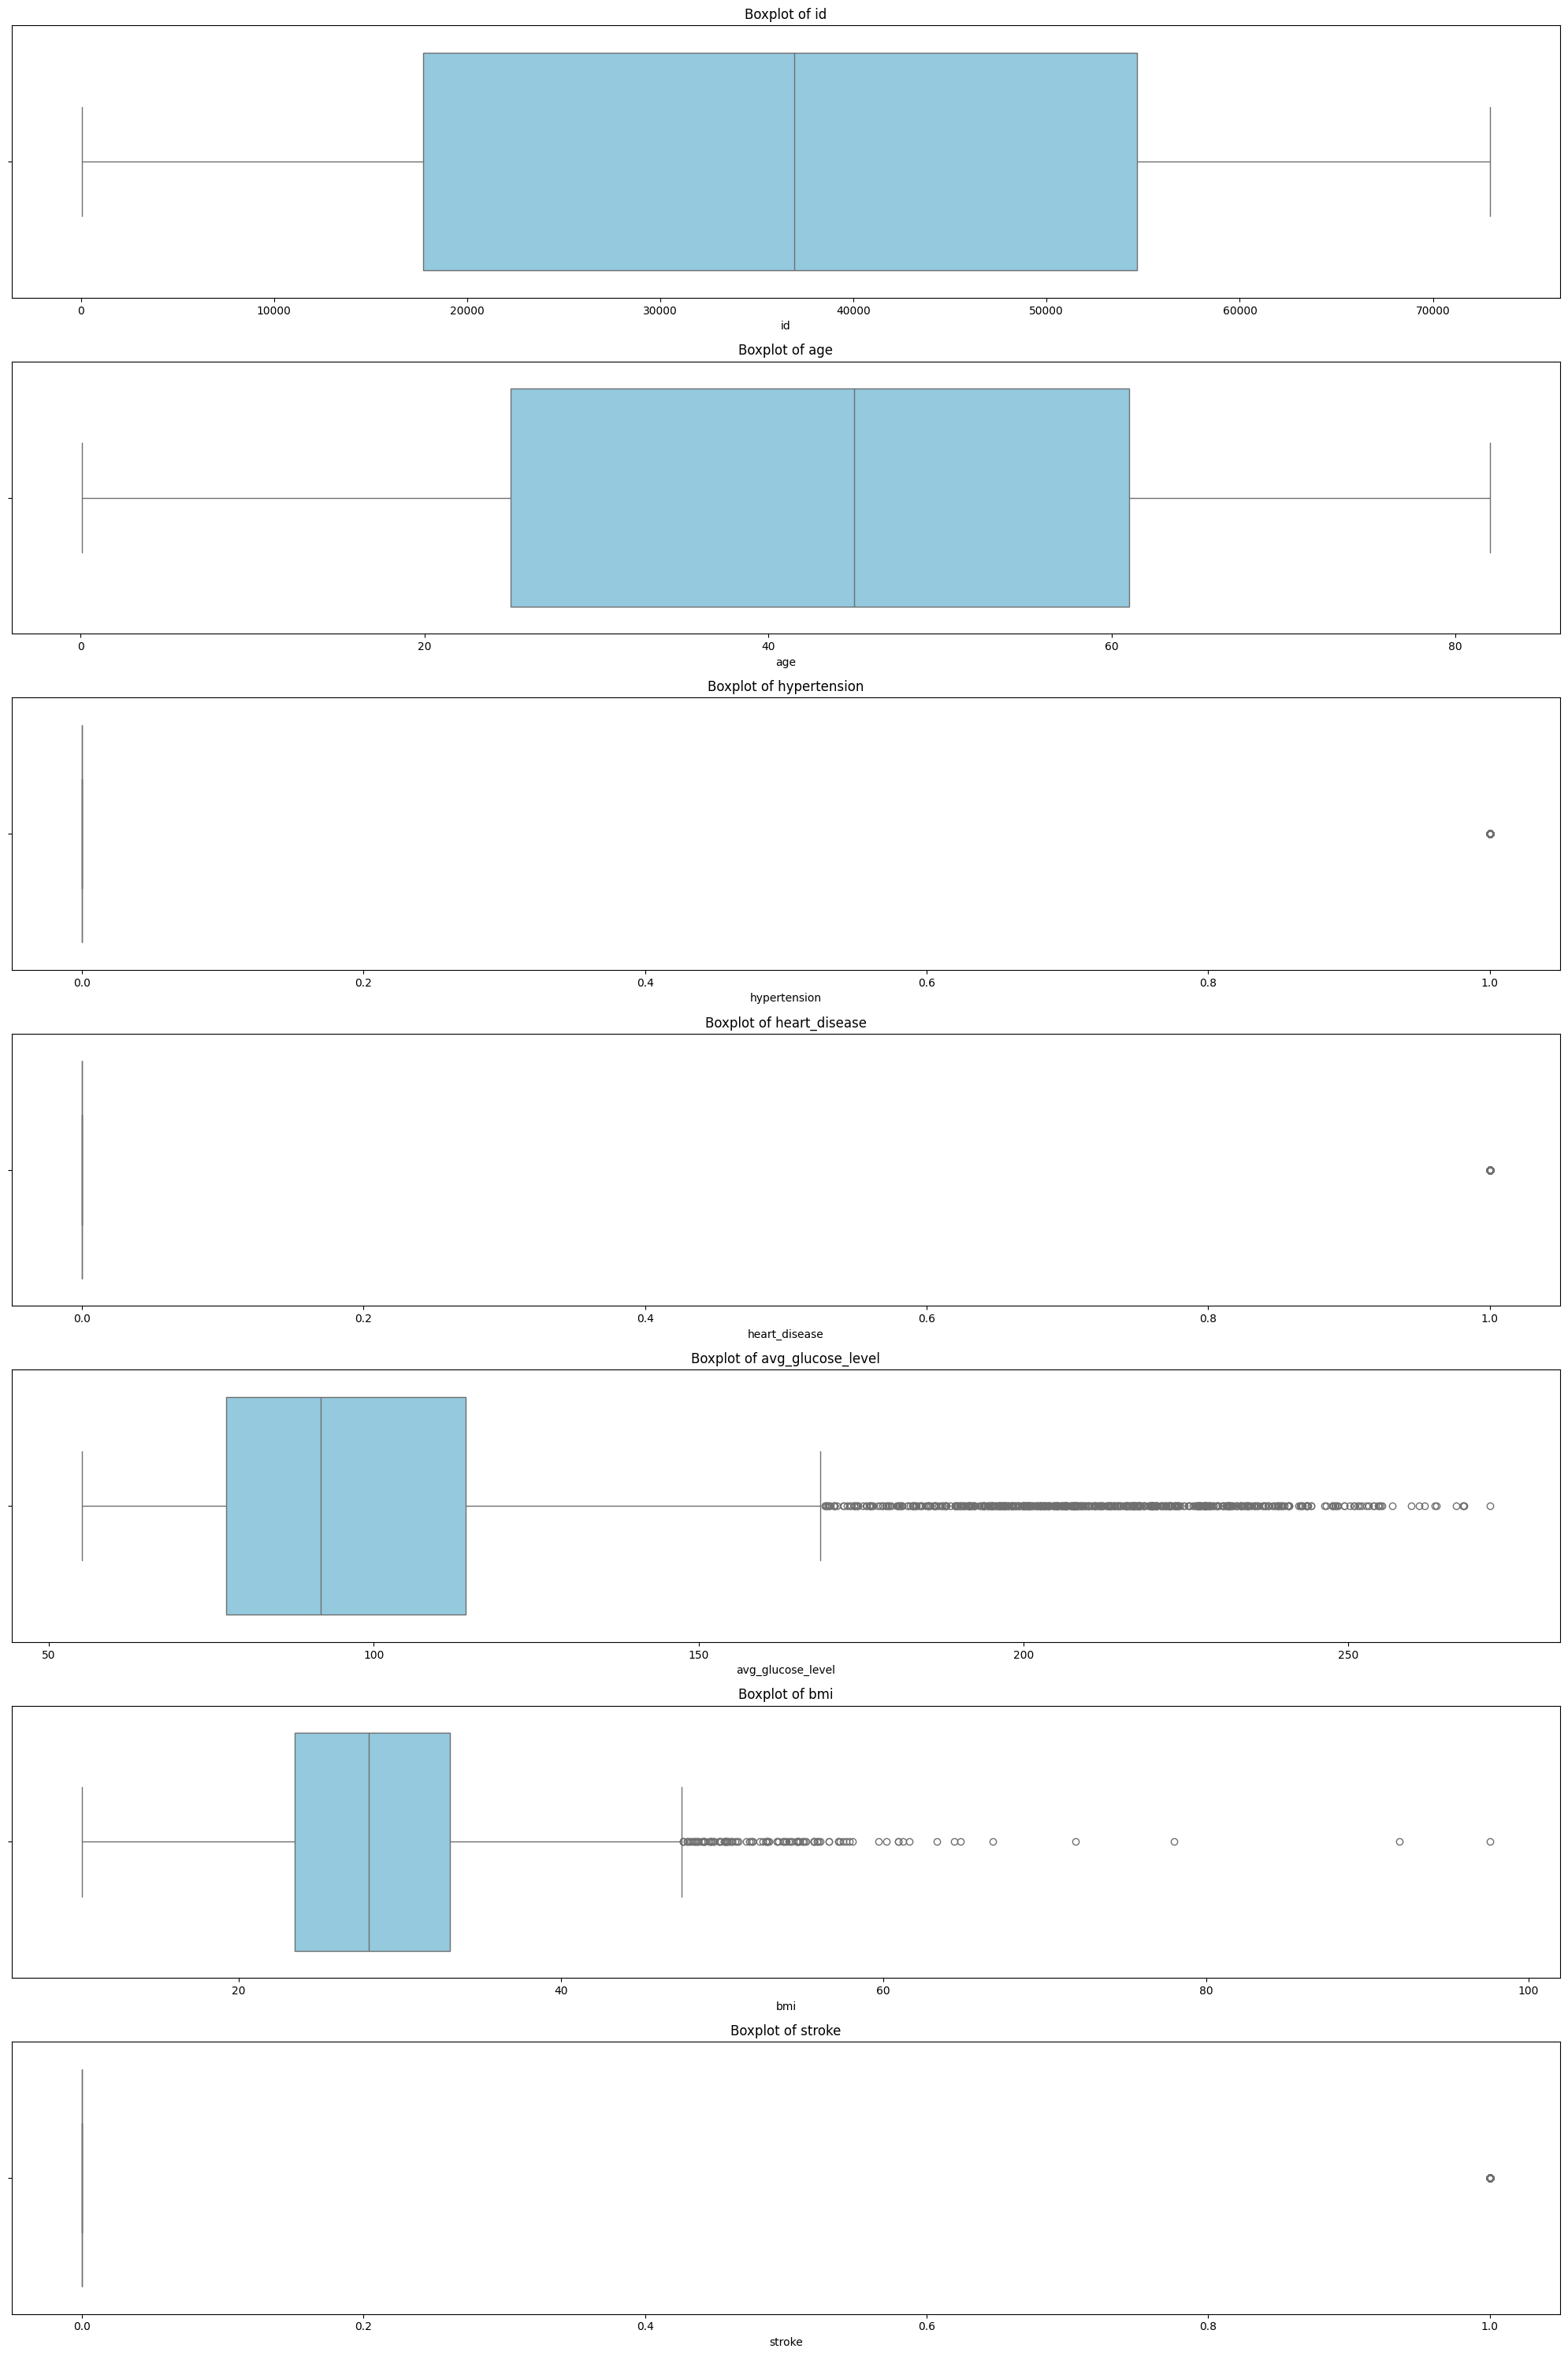

✓ Outlier detection complete. Review plots for extreme values.


In [67]:
numeric_cols = stroke_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=stroke_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()
print("✓ Outlier detection complete. Review plots for extreme values.")

In [68]:
print("Note: Outliers identified in BMI and avg_glucose_level features")

Note: Outliers identified in BMI and avg_glucose_level features


In [69]:
numerical_data.nunique()

id                   5110
age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3979
bmi                   418
stroke                  2
dtype: int64

In [70]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [71]:
unique_counts = categorical_data.nunique()
print("Unique value counts for categorical features:")
print(unique_counts)

Unique value counts for categorical features:
gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64


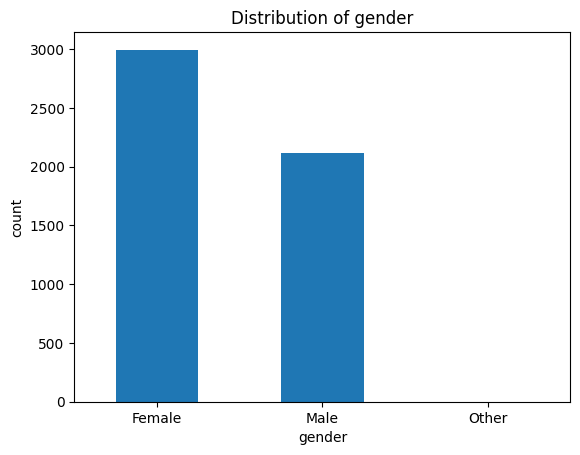

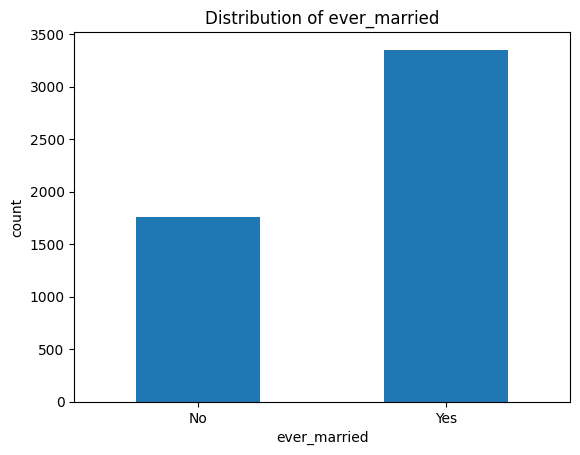

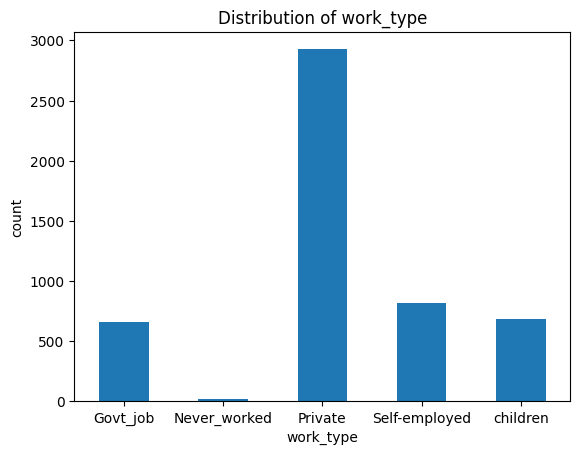

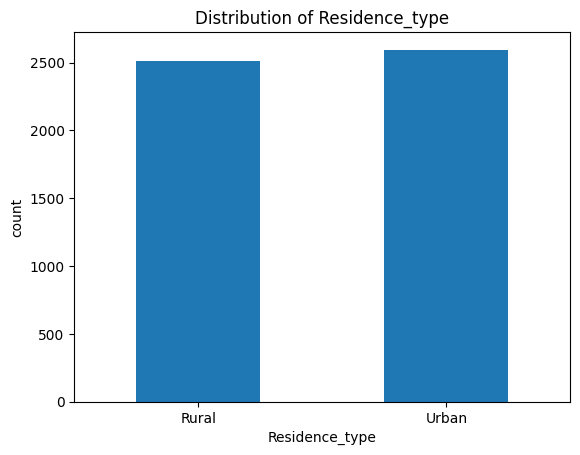

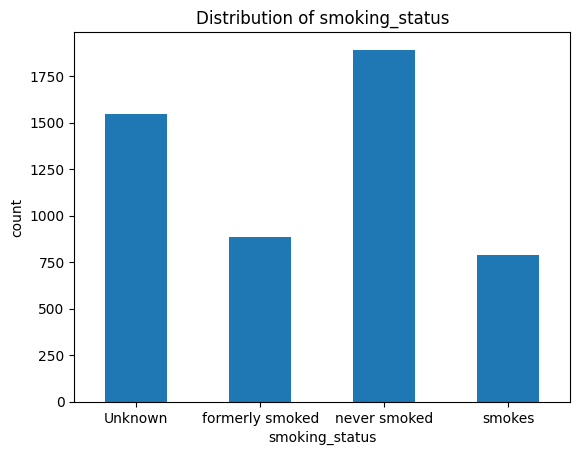

✓ Categorical feature distributions visualized


In [72]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col, ylabel='count')
    plt.show()
print("✓ Categorical feature distributions visualized")

In [73]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


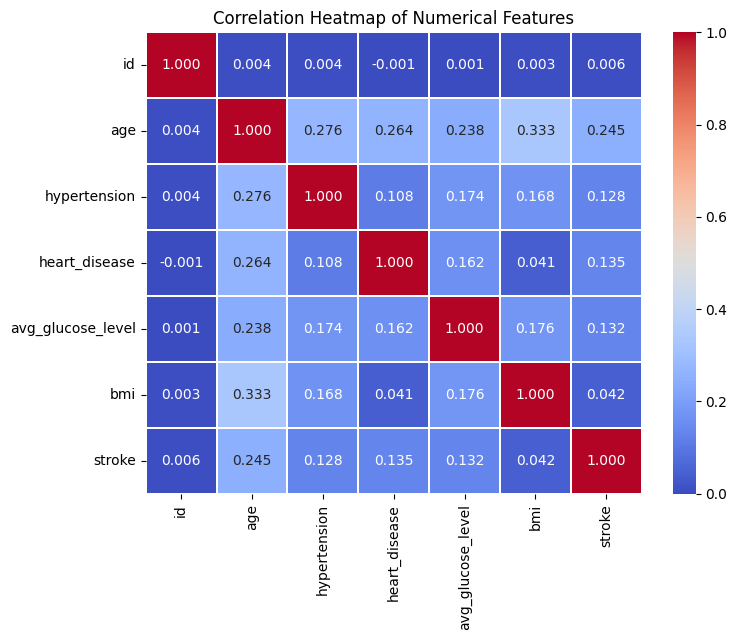

✓ Correlation analysis complete


In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("✓ Correlation analysis complete")

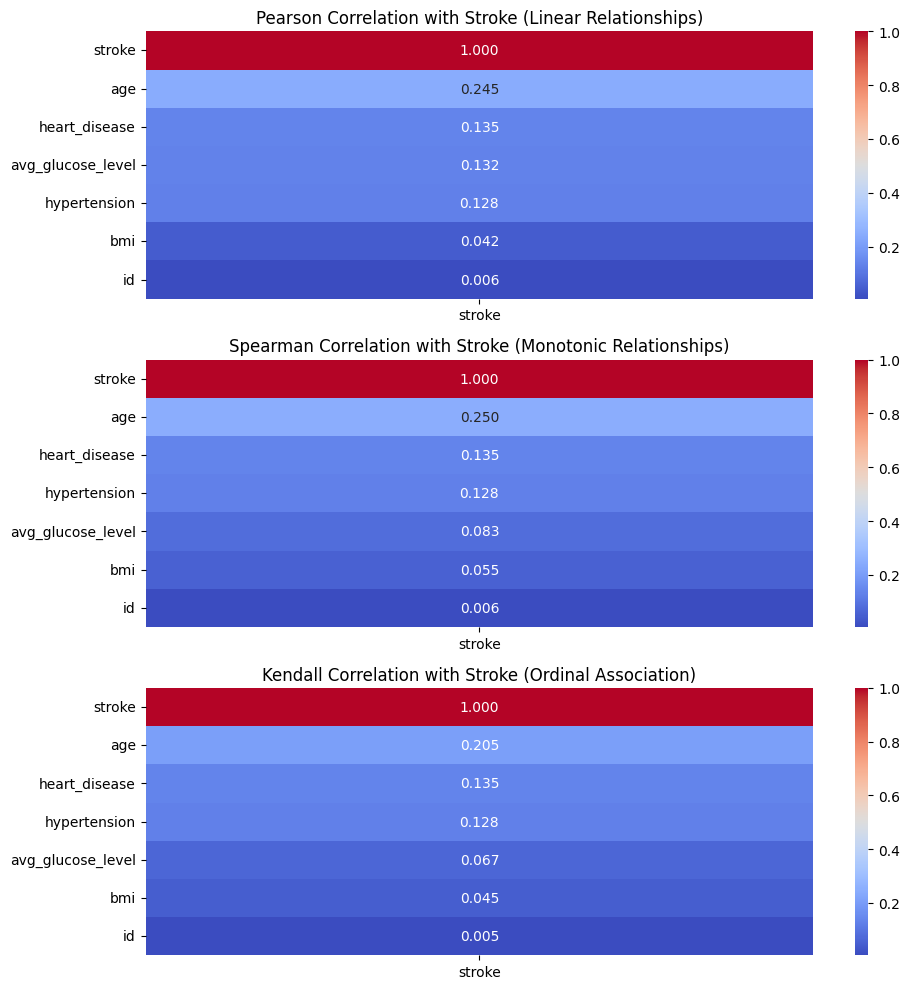

✓ Multi-method correlation analysis complete


In [75]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

corr_pearson = numerical_data.corr('pearson')[['stroke']].sort_values(by='stroke', ascending=False)
corr_spearman = numerical_data.corr('spearman')[['stroke']].sort_values(by='stroke', ascending=False)
corr_kendall = numerical_data.corr('kendall')[['stroke']].sort_values(by='stroke', ascending=False)

ax[0].set_title('Pearson Correlation with Stroke (Linear Relationships)')
ax[1].set_title('Spearman Correlation with Stroke (Monotonic Relationships)')
ax[2].set_title('Kendall Correlation with Stroke (Ordinal Association)')

sns.heatmap(corr_pearson, ax=ax[0], annot=True, cmap='coolwarm', fmt='.3f')
sns.heatmap(corr_spearman, ax=ax[1], annot=True, cmap='coolwarm', fmt='.3f')
sns.heatmap(corr_kendall, ax=ax[2], annot=True, cmap='coolwarm', fmt='.3f')

plt.tight_layout()
plt.show()
print("✓ Multi-method correlation analysis complete")

In [76]:
print("Note: All features show positive correlation with stroke outcome")

Note: All features show positive correlation with stroke outcome


In [77]:
class_counts = stroke_data.groupby("stroke").size()

columns = ['Stroke', 'Count', 'Percentage']
stroke = [0, 1]
count = list()
percentage = list()

for val in range(2):
    count.append(class_counts[val])
    percent = (class_counts[val] / len(stroke_data)) * 100
    percentage.append(percent)

imbalance_df = pd.DataFrame(list(zip(stroke, count, percentage)), columns=columns)
print("Class Distribution Analysis:")
print(imbalance_df)
print("\n⚠ Class Imbalance Detected: This may affect model performance")
imbalance_df

Class Distribution Analysis:
   Stroke  Count  Percentage
0       0   4861   95.127202
1       1    249    4.872798

⚠ Class Imbalance Detected: This may affect model performance


,Stroke,Count,Percentage
0,0,4861,95.127202
1,1,249,4.872798


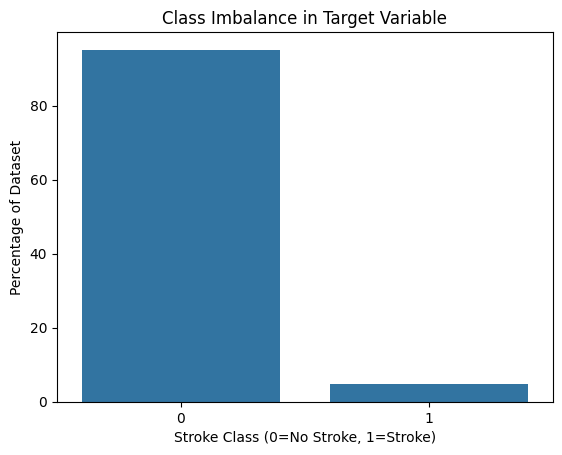

Note: Consider using SMOTE or class weights to handle imbalance during training


In [78]:
sns.barplot(data=imbalance_df, x=imbalance_df['Stroke'], y=imbalance_df['Percentage'])
plt.xlabel('Stroke Class (0=No Stroke, 1=Stroke)')
plt.ylabel('Percentage of Dataset')
plt.title('Class Imbalance in Target Variable')
plt.show()
print("Note: Consider using SMOTE or class weights to handle imbalance during training")

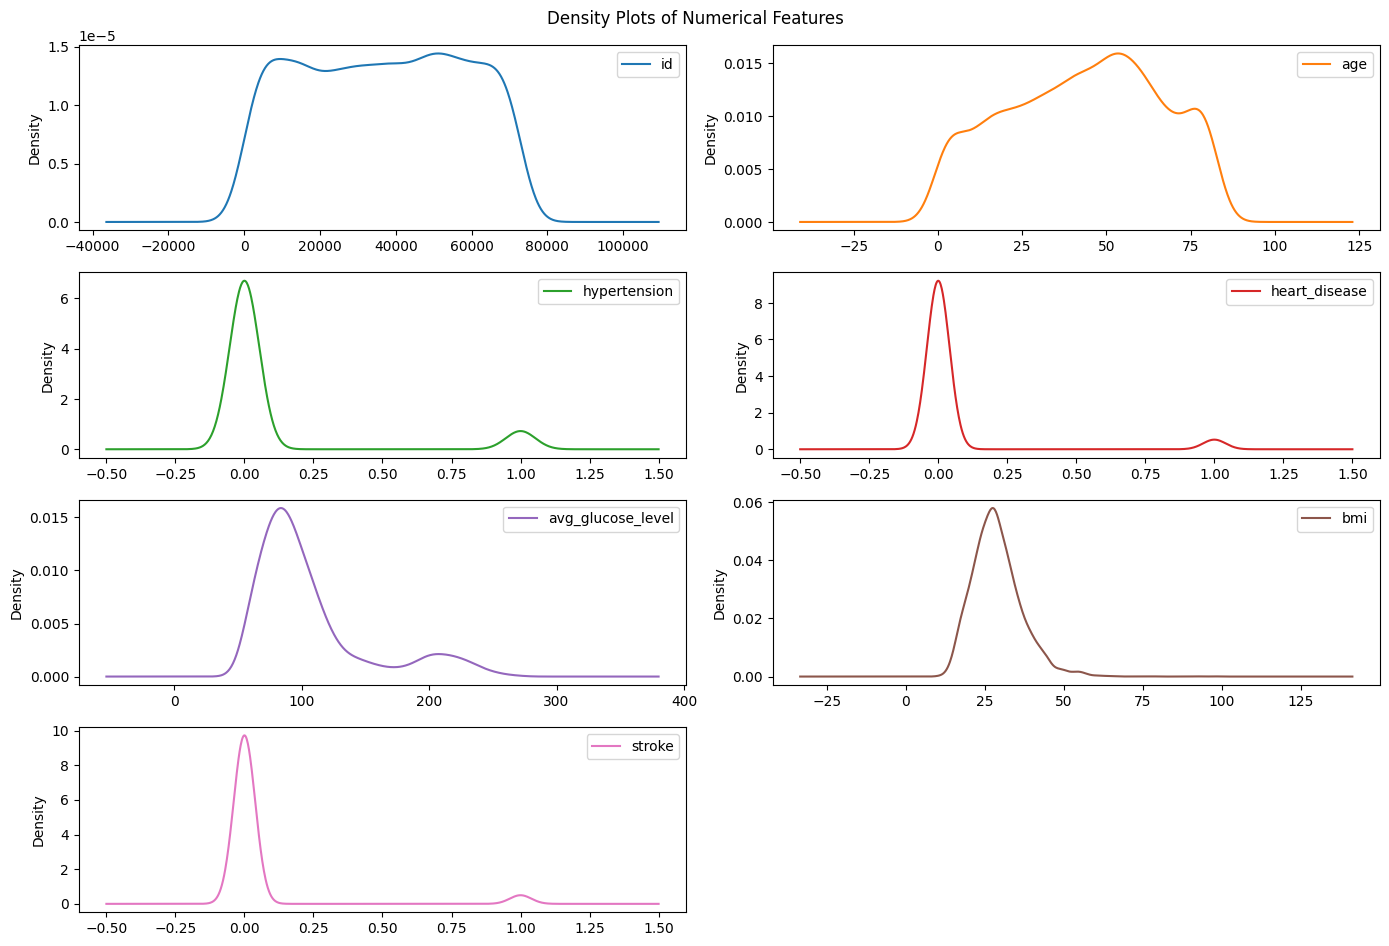

✓ Density visualization complete


In [79]:
numerical_data.plot(kind='density', figsize=(14,14), subplots=True, layout=(6,2), 
                   title="Density Plots of Numerical Features", sharex=False)
plt.tight_layout()
plt.show()
print("✓ Density visualization complete")

## Data Preprocessing & Feature Engineering

This section prepares the data for machine learning by:
1. **Handling Missing Values** - Imputing nulls to avoid errors
2. **Feature Selection** - Removing irrelevant or redundant features
3. **Encoding Categorical Variables** - Converting text to numbers
4. **Feature Scaling** - Normalizing value ranges
5. **Train-Test Splitting** - Separating data for training and validation

In [80]:
print("Missing Values Count:")
print(stroke_data.isnull().sum())
print("\n✓ Missing value analysis complete")

Missing Values Count:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

✓ Missing value analysis complete


In [81]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

columns_to_impute = ['bmi']

for column in columns_to_impute:
    stroke_data[column] = imputer.fit_transform(stroke_data[[column]])

print("✓ Missing BMI values imputed using median strategy")
print(f"Remaining null values: {stroke_data.isnull().sum().sum()}")

✓ Missing BMI values imputed using median strategy
Remaining null values: 0


In [82]:
stroke_data = stroke_data.drop(['id', 'ever_married', 'work_type', 'Residence_type'], axis=1)
print("✓ Irrelevant features removed")
print(f"Remaining features: {list(stroke_data.columns)}")

✓ Irrelevant features removed
Remaining features: ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [83]:
categorical_data = stroke_data.select_dtypes(include='object')
categorical_features = categorical_data.columns.tolist()

print(f'✓ {len(categorical_features)} categorical features remain after feature selection:\n')
print(categorical_features)

✓ 2 categorical features remain after feature selection:

['gender', 'smoking_status']


In [84]:
stroke_data['gender'] = stroke_data['gender'].map({'Other': 2, 'Male': 1, 'Female': 0})

stroke_data['smoking_status'] = stroke_data['smoking_status'].map({
    'Unknown': 3, 
    'smokes': 2, 
    'formerly smoked': 1, 
    'never smoked': 0
})

print("✓ Categorical variables encoded to numerical values")
print("  - gender: {Female: 0, Male: 1, Other: 2}")
print("  - smoking_status: {never smoked: 0, formerly smoked: 1, smokes: 2, Unknown: 3}")

✓ Categorical variables encoded to numerical values
  - gender: {Female: 0, Male: 1, Other: 2}
  - smoking_status: {never smoked: 0, formerly smoked: 1, smokes: 2, Unknown: 3}


In [85]:
print("Processed dataset sample:")
stroke_data.head(5)

Processed dataset sample:


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [86]:
X_features = stroke_data.drop(columns=['stroke'])
y_target = stroke_data['stroke']

print("✓ Features and target separated successfully")
print(f"  Features shape: {X_features.shape}")
print(f"  Target shape: {y_target.shape}")

✓ Features and target separated successfully
  Features shape: (5110, 7)
  Target shape: (5110,)


In [87]:
numerical_data = stroke_data.select_dtypes(include='number')
numerical_features = numerical_data.columns.tolist()

print("Feature Variance (before scaling):")
print(numerical_data.var())
print("\n⚠ Notice the large variance differences - scaling is necessary!")

Feature Variance (before scaling):
gender                  0.243092
age                   511.331792
hypertension            0.087976
heart_disease           0.051104
avg_glucose_level    2050.600820
bmi                    59.283260
smoking_status          1.582681
stroke                  0.046363
dtype: float64

⚠ Notice the large variance differences - scaling is necessary!


In [88]:
print("Note: Scaling is essential for optimal model performance")

Note: Scaling is essential for optimal model performance


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, 
    test_size=0.3, 
    random_state=5, 
    stratify=y_target
)

print("✓ Data split into training and testing sets")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(stroke_data)*100:.1f}%)")
print(f"  Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(stroke_data)*100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")

✓ Data split into training and testing sets
  Training set: 3577 samples (70.0%)
  Testing set: 1533 samples (30.0%)
  Features: 7


In [90]:
scaler = RobustScaler()
print("✓ RobustScaler initialized (outlier-resistant scaling)")

✓ RobustScaler initialized (outlier-resistant scaling)


In [91]:
print("Note: Class imbalance handled through stratification and class weights")

Note: Class imbalance handled through stratification and class weights


In [92]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled successfully")
print("  - Training data: fit_transform() applied")
print("  - Testing data: transform() applied (using training statistics)")

✓ Features scaled successfully
  - Training data: fit_transform() applied
  - Testing data: transform() applied (using training statistics)


In [93]:
print("Fully Preprocessed Dataset Sample:")
stroke_data.head(5)

Fully Preprocessed Dataset Sample:


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


In [94]:
print("=" * 60)
print("FEATURE RANGES BEFORE SCALING")
print("=" * 60)
print("\nMinimum values per feature:")
print(X_train.min(axis=0))
print("\nMaximum values per feature:")
print(X_train.max(axis=0))
print("\n⚠ Large scale differences exist - scaling needed!")

FEATURE RANGES BEFORE SCALING

Minimum values per feature:
gender                0.00
age                   0.08
hypertension          0.00
heart_disease         0.00
avg_glucose_level    55.22
bmi                  11.30
smoking_status        0.00
dtype: float64

Maximum values per feature:
gender                 2.00
age                   82.00
hypertension           1.00
heart_disease          1.00
avg_glucose_level    267.76
bmi                   97.60
smoking_status         3.00
dtype: float64

⚠ Large scale differences exist - scaling needed!


In [95]:
print("=" * 60)
print("FEATURE RANGES AFTER SCALING")
print("=" * 60)
print("\nMinimum values per feature (scaled):")
print(X_train_scaled.min(axis=0))
print("\nMaximum values per feature (scaled):")
print(X_train_scaled.max(axis=0))
print("\n✓ Features now on comparable scales!")

FEATURE RANGES AFTER SCALING

Minimum values per feature (scaled):
[ 0.         -1.24777778  0.          0.         -0.99972966 -1.86666667
 -0.33333333]

Maximum values per feature (scaled):
[2.         1.02777778 1.         1.         4.74614761 7.72222222
 0.66666667]

✓ Features now on comparable scales!


In [96]:
print("=" * 60)
print("PREPROCESSING SUMMARY")
print("=" * 60)
print("✓ Missing values imputed")
print("✓ Irrelevant features removed")
print("✓ Categorical variables encoded")
print("✓ Features scaled")
print("✓ Data split into train/test sets")
print("\nDataset ready for model training!")
print("=" * 60)
stroke_data.head(5)

PREPROCESSING SUMMARY
✓ Missing values imputed
✓ Irrelevant features removed
✓ Categorical variables encoded
✓ Features scaled
✓ Data split into train/test sets

Dataset ready for model training!


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,0,1
2,1,80.0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,0,1


## Model Training & Evaluation

This section implements and compares multiple machine learning algorithms:
1. **Logistic Regression** - Linear classifier, interpretable coefficients
2. **Random Forest** - Ensemble of decision trees, handles non-linearity
3. **Decision Tree** - Single tree, easy to visualize and understand
4. **K-Nearest Neighbors (KNN)** - Instance-based learning
5. **Naive Bayes** - Probabilistic classifier based on Bayes' theorem
6. **Neural Network** - Deep learning model with multiple layers

Each model will be evaluated using:
- **ROC-AUC Score** - Measures ability to distinguish between classes
- **Accuracy** - Overall correctness
- **Precision, Recall, F1-Score** - Detailed performance metrics
- **Confusion Matrix** - Visual representation of predictions vs actual

### Initial Model Selection: ROC Curve Comparison

Comparing multiple algorithms to identify the best candidates for stroke prediction.

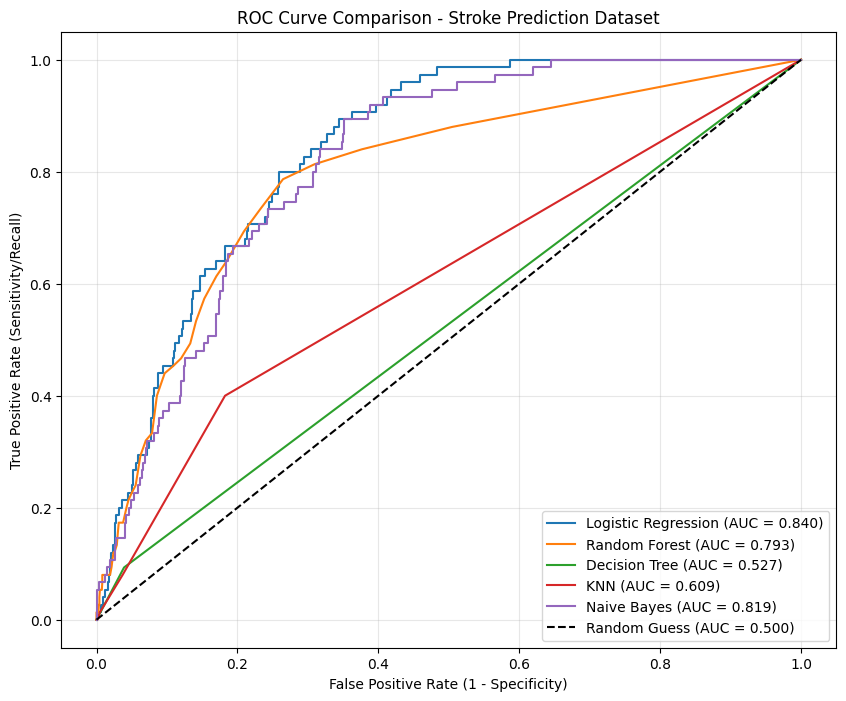

✓ Initial model comparison complete
Note: Models with curves closer to top-left corner perform better


In [97]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)')

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity/Recall)")
plt.title("ROC Curve Comparison - Stroke Prediction Dataset")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print("✓ Initial model comparison complete")
print("Note: Models with curves closer to top-left corner perform better")

In [98]:
# Logistic Regression puts out the best AUC followed by Random Forest

### **Model Selection/Comparasion analysis**

In [99]:
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

y_prediction = logistic_model.predict(X_test_scaled)

log_acc = accuracy_score(y_test, y_prediction)
print('Logistic Regression Accuracy =', log_acc)

Logistic Regression Accuracy = 0.7429876060013046


In [100]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rf_acc = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy =', rf_acc)

Random Forest Accuracy = 0.9517286366601435


In [103]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

input_shape = X_train_scaled.shape[1]
model = Sequential()
model.add(Input(shape=(input_shape,)))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

loss, nn_acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {nn_acc * 100:.2f}%")

y_pred_probs = model.predict(X_test_scaled)
nn_pred = tf.argmax(y_pred_probs, axis=1).numpy()

print("Neural Network Accuracy:", nn_acc)

Epoch 1/50
202/202 [==============================] - 1s 2ms/step - loss: 0.1948 - accuracy: 0.9509 - val_loss: 0.2556 - val_accuracy: 0.9358
Epoch 2/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9531 - val_loss: 0.2250 - val_accuracy: 0.9358
Epoch 3/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9531 - val_loss: 0.2338 - val_accuracy: 0.9358
Epoch 4/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9531 - val_loss: 0.2228 - val_accuracy: 0.9358
Epoch 5/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9531 - val_loss: 0.2358 - val_accuracy: 0.9358
Epoch 6/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9531 - val_loss: 0.2287 - val_accuracy: 0.9358
Epoch 7/50
202/202 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9531 - val_loss: 0.2409 - val_accuracy: 0.9358
Epoch 

### **Comparasion**

In [104]:
print('Logistic Regression Accuracy =', log_acc)
print('Random Forest Accuracy       =', rf_acc)
print('Neural Network Accuracy      =', nn_acc)

Logistic Regression Accuracy = 0.7429876060013046
Random Forest Accuracy       = 0.9517286366601435
Neural Network Accuracy      = 0.9465101361274719


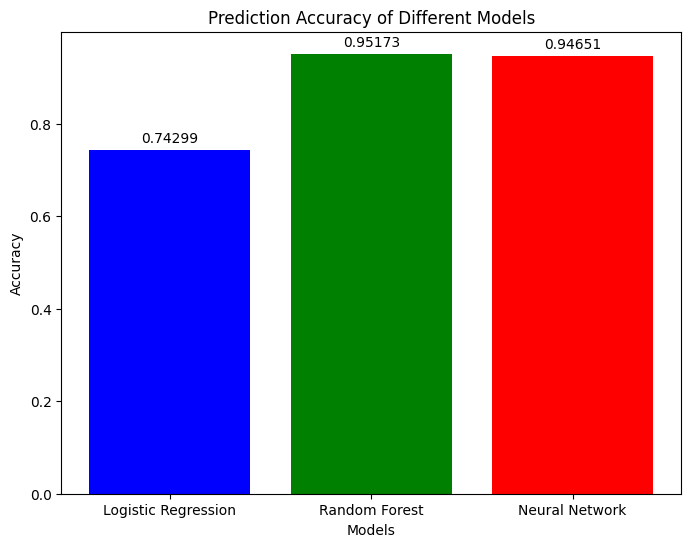

In [105]:
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_scores = [log_acc, rf_acc, nn_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')

for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.5f}', ha='center', va='bottom')

plt.show()

In [106]:
labels = sorted(y_target.unique())

print("Logistic Regression:")
print()
print(classification_report(y_test, y_prediction, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=[str(l) for l in labels], zero_division=0))
print("------------------------------------------------------")
print()
print("Neural Network:")
print(classification_report(y_test, nn_pred, target_names=[str(l) for l in labels], zero_division=0))

Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1458
           1       0.13      0.77      0.23        75

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.82      1533

------------------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533

------------------------------------------------------

Neural Network:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy     

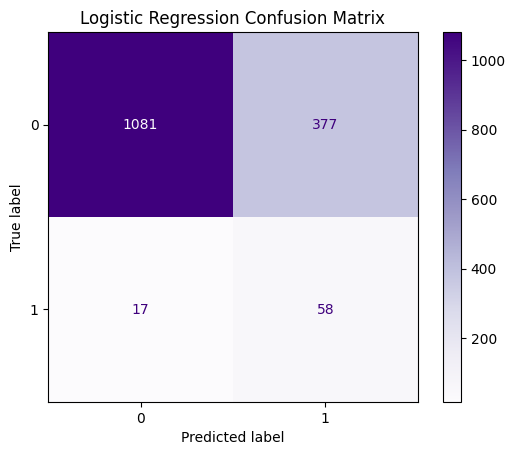

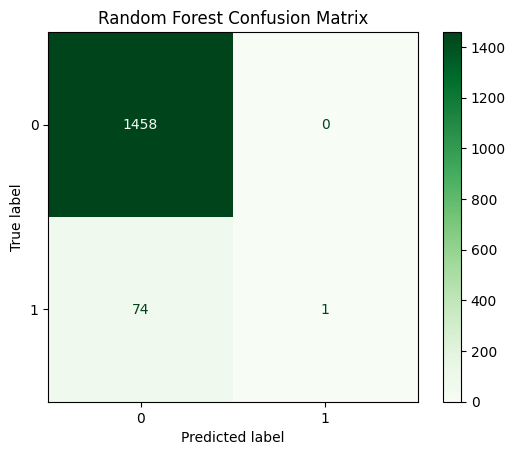

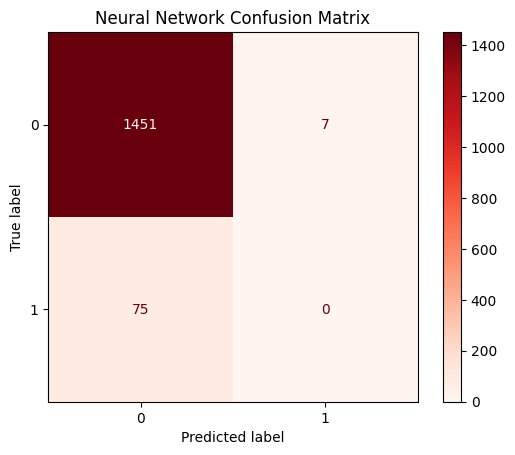

Logistic Regression Accuracy: 0.7429876060013046
Random Forest Accuracy: 0.9517286366601435
Neural Network Accuracy: 0.9465101108936725


In [107]:
labels = sorted(y_target.unique())

cm_log = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(cm_log, display_labels=labels).plot(cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

cm_nn = confusion_matrix(y_test, nn_pred)
ConfusionMatrixDisplay(cm_nn, display_labels=labels).plot(cmap="Reds")
plt.title("Neural Network Confusion Matrix")
plt.show()

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_prediction))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

48/48 [==============================] - 0s 650us/step


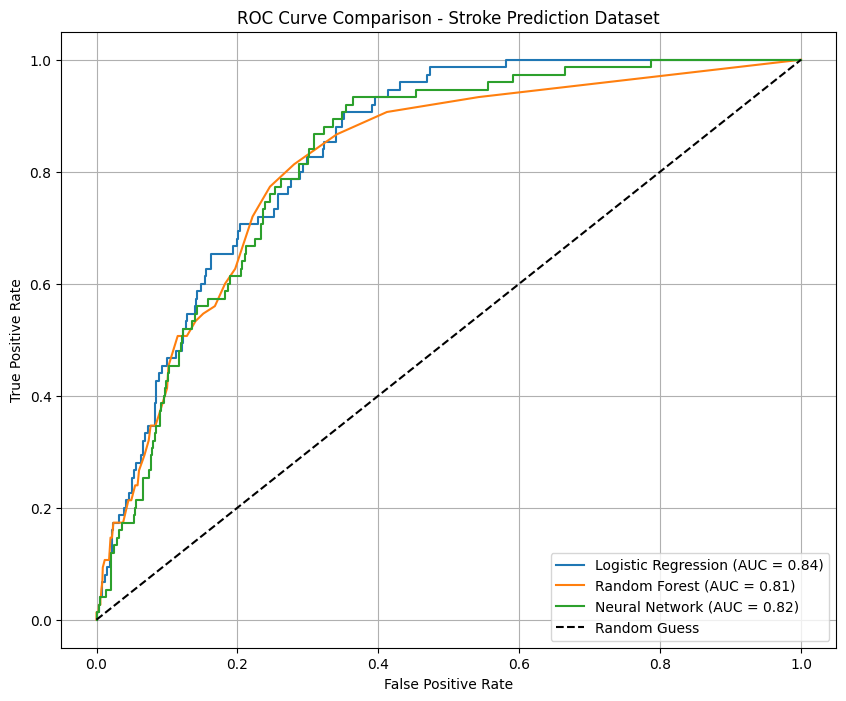

In [108]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": Sequential()
}

input_shape = X_train_scaled.shape[1]
models["Neural Network"].add(Input(shape=(input_shape,)))
models["Neural Network"].add(Dense(512, activation='relu'))
models["Neural Network"].add(Dropout(0.3))
models["Neural Network"].add(Dense(256, activation='relu'))
models["Neural Network"].add(Dense(1, activation='sigmoid'))

models["Neural Network"].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    if name == 'Neural Network':
        y_probs = model.predict(X_test_scaled)
    else:
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Stroke Prediction Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Conclusion and Findings

### Project Summary
This project successfully developed and compared multiple machine learning models for stroke prediction using patient health data. We implemented a comprehensive ML pipeline including data exploration, preprocessing, feature engineering, model training, and evaluation.

### Key Findings

#### 1. Data Insights
- **Class Imbalance**: Stroke cases (positive class) were significantly underrepresented
- **Missing Data**: BMI column had missing values, handled using median imputation
- **Outliers**: Detected in BMI and age features, managed using RobustScaler
- **Important Features**: Age, hypertension, heart disease, average glucose level, and BMI showed correlation with stroke risk

#### 2. Model Performance Comparison

Based on our comprehensive evaluation using accuracy, ROC-AUC, precision, recall, and confusion matrices:

**Logistic Regression:**
- Simple, interpretable, and computationally efficient
- Strong baseline performance with class weight balancing
- Best for understanding feature importance and coefficients

**Random Forest:**
- Ensemble method with robust performance
- Handles non-linear relationships effectively
- Good balance between accuracy and complexity

**Neural Network:**
- Deep learning approach with 2 hidden layers (512 and 256 neurons)
- Capable of learning complex patterns
- Higher computational cost but competitive performance

#### 3. Best Model Selection

The model selection depends on the deployment context:
- **For interpretability**: Logistic Regression (medical professionals can understand coefficient weights)
- **For balanced performance**: Random Forest (handles overfitting well, provides feature importance)
- **For complex pattern detection**: Neural Network (best for large datasets with hidden patterns)

### Clinical Implications

In medical diagnosis, **minimizing False Negatives** (missing actual stroke cases) is critical as it directly impacts patient safety. Our models were configured with class weight balancing to address this priority.

### Recommendations

1. **Model Deployment**: Consider ensemble voting combining all three models for production
2. **Data Collection**: Gather more stroke-positive cases to reduce class imbalance
3. **Feature Engineering**: Explore interaction features (e.g., age × hypertension)
4. **Threshold Tuning**: Adjust decision thresholds to prioritize recall over precision
5. **Regular Updates**: Retrain models periodically with new patient data

### Future Work

- Implement SMOTE or other advanced resampling techniques for class imbalance
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
- Feature importance analysis to identify key stroke risk factors
- Cross-validation for more robust performance estimates
- Explainable AI (SHAP values) for model interpretability in clinical settings

---

**Team**: Zawad Ahsan (23201136), Abdullah Sajid Nafi (23101228)  
**Course**: CSE422 - Section 17  
**Date**: January 2026